<a href="https://colab.research.google.com/github/asadstat/Data_analysis/blob/master/Assignment_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import required library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset loading

In [ ]:
df1= pd.read_csv('C:/Users/User/Downloads/Data_Analyst_Task/Data/data_1.csv')
df2= pd.read_excel('C:/Users/User/Downloads/Data_Analyst_Task/Data/data_2.xlsx') 

### Check out information

In [ ]:
df1.head(3)

,No,Age,Sex,Reason,Status,Location,CrossSec,LymphNodeDisec,Resected,lymphatic_invasion,...,FinalP,FinalMeta,JGCAStage,FinalCurability,FinalT,fTNM_N,TNMStage,Days,Months,sex1
0,1,2,2,,,3,1,2,1,1,...,0,0,2,1,2,0,2,1662,138.500000,
1,2,2,1,2,1,2,1,2,1,3,...,1,0,6,3,4,3,6,637,53.083333,2
2,3,2,2,,,1,1,1,1,0,...,0,0,1,1,1,0,1,1403,116.916667,1


In [ ]:
df2.head(3)

,age,edulev,financial_income_Increase,economic_condition_Status,Afect_mental_health,ecmh,tddp,ssti,hadp,WEIGHT
0,23,Undergraduate,No,Stable,Yes,Depression,Most of the times,Incressed,Watching movies,117.0
1,32,Post-graduate,Yes,Unstable,Yes,Depression,Sometimes,Incressed,Social media,NaN
2,22,Undergraduate,Yes,Stable,Yes,Overthinking,Sometimes,Incressed,Watching movies,144.0


Based on the assignment_2, as I have been told to work on the data_2 first, so, I'm going to work on top of the mentioned dataset

### 1. Find the missing value and replace with appropriate method for variable WEIGHT

In [ ]:
df2['WEIGHT'].isna().sum()

6

Observation: It can be said that there are a total of 6 missing values under WEIGHT. So, we have to replace it in an appropriate way because missing values are not important but the best strategy to eliminate. But in this, the problem that arises is that when we have small datasets and if we remove rows with missing data then the dataset becomes very small and the machine learning model will not give good results on a small dataset.So to avoid this problem we can apply alternative approach. The next method is to input the missing values. We do this by either replacing the missing value with some random value or with the median/mean of the rest of the data.Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out. In this case, I'm going to use the median because somewhat better representation can be obtained by applying this startegy.

In [ ]:
df2['WEIGHT'] = df2['WEIGHT'].fillna(df2['WEIGHT'].median())

In [ ]:
df2.head(5)

,age,edulev,financial_income_Increase,economic_condition_Status,Afect_mental_health,ecmh,tddp,ssti,hadp,WEIGHT
0,23,Undergraduate,No,Stable,Yes,Depression,Most of the times,Incressed,Watching movies,117.0
1,32,Post-graduate,Yes,Unstable,Yes,Depression,Sometimes,Incressed,Social media,175.5
2,22,Undergraduate,Yes,Stable,Yes,Overthinking,Sometimes,Incressed,Watching movies,144.0
3,21,Undergraduate,Yes,Stable,Yes,Depression,Most of the times,Incressed,Social media,175.5
4,18,Undergraduate,Yes,Unstable,Yes,Depression,Most of the times,I don't spend time on the internet,Reading books,175.5


### 2. Finding the correlation between age and weight

In a word, Correlation is a relationship between two variable. In other words, Correlation indicates the extent to which two or more variables fluctuate together. The value of correlation is scaled, within -1 to 1. The closer to 1 the more powerful the connection between the two variables, the lower the relationship closer to 0. According to the coorelation scale, 0.2<=r <= 0.39 considered to be a Low Coorelation.

In [ ]:
correlation = df2["age"].corr(df2["WEIGHT"])

correlation

0.02020623129561244

<AxesSubplot:xlabel='age', ylabel='WEIGHT'>

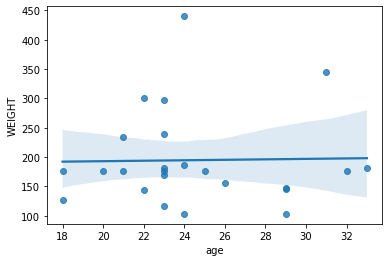

In [ ]:
import seaborn as sns

sns.regplot(x=df2["age"], y=df2["WEIGHT"])

<AxesSubplot:>

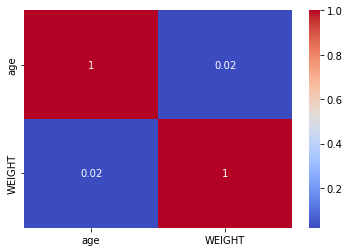

In [ ]:
import seaborn as sns
sns.heatmap(df2.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

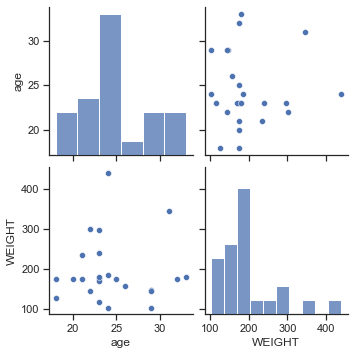

In [ ]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(df2)
plt.show()

Observation: Taking a close look at the above coorelation plot, we can measure the relationship between age and weight. Already, it is found to be 0.02 for the two variables, which indicates that there is a Low coorelation between the variables. On the other hand, the above pair plot, reg plot and heatmap also assures the Low coorelation between the age and weight.

### 3. Finding the outlier for variable WEIGHT

The box plot is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers. The line of code below plots the box plot of the numeric variable 'WEIGHT'.

#### Identifying the outliers with Boxplot

<AxesSubplot:>

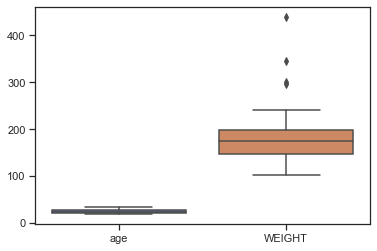

In [ ]:
sns.boxplot(data=df2)

Observation: In the above output, the circles indicate the outliers, and there are many. It is also possible to identify outliers using more than one variable. There can be many reasons for the presence of outliers in the data. Sometimes the outliers may be genuine, while in other cases, they could exist because of data entry errors. It is important to understand the reasons for the outliers before cleaning them. We will start the process of finding outliers by running the summary statistics on the variables. This is done using the describe() function below, which provides a statistical summary of all the quantitative variables.

In [ ]:
df2.describe()

,age,WEIGHT
count,24.000000,24.000000
mean,24.416667,194.625000
std,4.116950,80.096172
min,18.000000,103.000000
25%,22.000000,147.250000
50%,23.000000,175.500000
75%,26.750000,198.000000
max,33.000000,440.000000


Looking at the 'WEIGHT' variable, it is easy to detect outliers resulting from incorrect data. The minimum and maximum WEIGHTS are 103, and 440, respectively.These outliers were easy to detect, butthat will not always be the case. In other cases, mathematical and visualization techniques must be used.

#### Finding outliers with Histogram

A histogram is used to visualize the distribution of a numerical variable. An outlier will appear outside the overall pattern of distribution. The line of code below plots a histogram of the 'WEIGHT' variable, using the hist() function.

<AxesSubplot:>

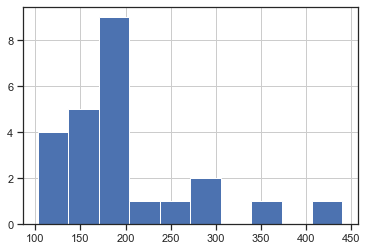

In [ ]:
df2.WEIGHT.hist()

The above chart shows that the distribution is right-skewed, and there are extreme higher values at the right of the histogram. This step can be repeated for other variables as well.

### 4. Using data_1, find the missing value and replace all missing value for appropriate method.

In [ ]:
df1.tail(5)

,No,Age,Sex,Reason,Status,Location,CrossSec,LymphNodeDisec,Resected,lymphatic_invasion,...,FinalP,FinalMeta,JGCAStage,FinalCurability,FinalT,fTNM_N,TNMStage,Days,Months,sex1
13062,13063,2,2,,,2,4,2,1,2,...,1,0,6,3,4,2,6,216,18.000000,1
13063,13064,2,1,,,3,1,2,,0,...,0,0,4,2,3,2,5,844,70.333333,2
13064,13065,2,1,0,0,3,2,2,,1,...,0,0,5,2,3,1,4,31,2.583333,1
13065,13066,2,1,0,0,2,1,4,,0,...,0,0,1,1,1,0,1,33,2.750000,1
13066,13067,3,2,0,0,3,5,0,2,,...,0,0,,3,,0,,44,3.666667,1


Let's find out the missing values and deal with it

In [ ]:
df1.isnull().sum()

No                    0
Age                   0
Sex                   0
Reason                0
Status                0
Location              0
CrossSec              0
LymphNodeDisec        0
Resected              0
lymphatic_invasion    0
vascular_invasion     0
PathologicalDepth     0
pT                    0
PathologicalN         0
FinalDepthofInvas     0
FinalN                0
FinalH                0
FinalP                0
FinalMeta             0
JGCAStage             0
FinalCurability       0
FinalT                0
fTNM_N                0
TNMStage              0
Days                  0
Months                0
sex1                  0
dtype: int64

It is to be mentioned that, there is no missing values in the first dataset (dataset_1), so it is not required to fill out the missing values with the standard strategy. However, I'm going to keep the dataset remain without changing anything else. 

### 5. Making cross table using Data_2

I'm going to Use variable financial_income_Increase and economic_condition_Status and make cross table (using data_2)

In [ ]:
pd.crosstab(df2['financial_income_Increase'], df2['economic_condition_Status'])

economic_condition_Status,Stable,Unstable,completely broken
financial_income_Increase,,,
No,3,0,0
Yes,10,9,2


### 6. Making bivariate plot 

The term bivariate analysis refers to the analysis of two variables. The purpose of bivariate analysis is to understand the relationship between two variables. There are three common ways to perform bivariate analysis: Scatterplots, Correlation Coefficients and Simple Linear Regression. The following example shows how to perform each of these types of bivariate analysis in Python using the following pandas DataFrame that contains information about two variables: (1) Afect_mental_health and (2) ecmh. 

In [ ]:
df2.head(3)

,age,edulev,financial_income_Increase,economic_condition_Status,Afect_mental_health,ecmh,tddp,ssti,hadp,WEIGHT
0,23,Undergraduate,No,Stable,Yes,Depression,Most of the times,Incressed,Watching movies,117.0
1,32,Post-graduate,Yes,Unstable,Yes,Depression,Sometimes,Incressed,Social media,175.5
2,22,Undergraduate,Yes,Stable,Yes,Overthinking,Sometimes,Incressed,Watching movies,144.0


In [ ]:
# df2=df2.groupby(['Afect_mental_health','ecmh']).size()
# df2=df2.unstack()
# df2.plot(kind='bar')

#### Bivariate analysis with catplot

In [ ]:
# sns.catplot(x='Afect_mental_health', y= 'ecmh', data= df2, kind='bar', hue='age')
# plt.show()

<!-- Taking a close look at the second data framne, it can be observed that 'Afect_mental_health'and 'ecmh' rows are categorial, to the best of my knowledge, these values should be transformed into the form of numeric or any unique digit because bivariate analysis does not support text data. -->

In order to bivariate analysis, first of all the categorical values will have to be converted to the numeric form because the catplot, box plot, coorelation-coofecient and linear regression plot does not support the categorical data. So, I'm going to map the categorical parameters such as 'Afect_mental_health' and 'ecmh'

In [ ]:
df2['ecmh']

0                 Depression
1                 Depression
2               Overthinking
3                 Depression
4                 Depression
5                 Depression
6                 Depression
7               Overthinking
8               Overthinking
9                       None
10    Difficulty in sleeping
11                Depression
12                Depression
13              Overthinking
14    Difficulty in sleeping
15               Frustration
16               Frustration
17               Frustration
18                Depression
19               Frustration
20                Depression
21                Depression
22               Frustration
23                Depression
Name: ecmh, dtype: object

In [ ]:
df2['ecmh_encoded'] = df2['ecmh'].map( {'Depression':0, 'Overthinking':1, 'None':2, 'Difficulty in sleeping': 3, 'Frustration':4 })
df2[['ecmh', 'ecmh_encoded']]

,ecmh,ecmh_encoded
0,Depression,0
1,Depression,0
2,Overthinking,1
3,Depression,0
4,Depression,0
5,Depression,0
6,Depression,0
7,Overthinking,1
8,Overthinking,1
9,None,2


Let's map the 'ecmh' parameters because this variable contains the two categorical values, such as, Yes and No. I'm going to fill out this using Map function.

In [ ]:
df2['Afect_mental_health']

0     Yes
1     Yes
2     Yes
3     Yes
4     Yes
5     Yes
6     Yes
7     Yes
8     Yes
9      No
10    Yes
11    Yes
12    Yes
13    Yes
14    Yes
15    Yes
16    Yes
17    Yes
18    Yes
19    Yes
20    Yes
21    Yes
22    Yes
23    Yes
Name: Afect_mental_health, dtype: object

In [ ]:
df2['mhealth_encoded'] = df2['Afect_mental_health'].map( {'Yes':0, 'No':1})
df2[['Afect_mental_health', 'mhealth_encoded']]

,Afect_mental_health,mhealth_encoded
0,Yes,0
1,Yes,0
2,Yes,0
3,Yes,0
4,Yes,0
5,Yes,0
6,Yes,0
7,Yes,0
8,Yes,0
9,No,1


In [ ]:
df2.head(4)

,age,edulev,financial_income_Increase,economic_condition_Status,Afect_mental_health,ecmh,tddp,ssti,hadp,WEIGHT,echmh_encoded,echmh,ecmh_encoded,mhealth_encoded
0,23,Undergraduate,No,Stable,Yes,Depression,Most of the times,Incressed,Watching movies,117.0,0,0,0,0
1,32,Post-graduate,Yes,Unstable,Yes,Depression,Sometimes,Incressed,Social media,175.5,0,0,0,0
2,22,Undergraduate,Yes,Stable,Yes,Overthinking,Sometimes,Incressed,Watching movies,144.0,4,4,1,0
3,21,Undergraduate,Yes,Stable,Yes,Depression,Most of the times,Incressed,Social media,175.5,0,0,0,0


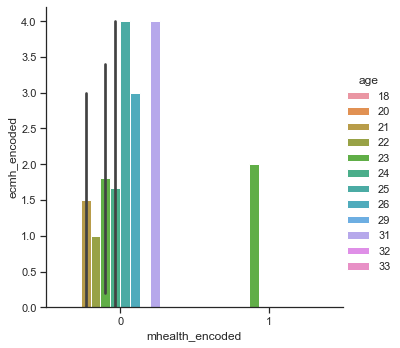

In [ ]:
sns.catplot(x='mhealth_encoded', y= 'ecmh_encoded', data= df2, kind='bar', hue='age')
plt.show()

<AxesSubplot:xlabel='Afect_mental_health'>

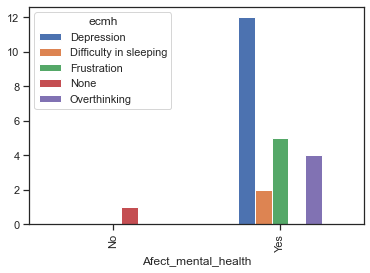

In [ ]:
temp_data= df2.copy()

temp_data=temp_data.groupby(['Afect_mental_health','ecmh']).size()
temp_data=temp_data.unstack()
temp_data.plot(kind='bar')